In [1]:
from IPython.display import display, HTML
import scipy.constants as sc
from scipy.optimize import fsolve
from ipywidgets import interact, widgets
%matplotlib notebook

import numpy as np
import cmath
import matplotlib.pyplot as plt
import scipy.constants as sc
plt.rcParams.update({
    "text.usetex": True,
    'text.latex.preamble': r"\usepackage{amsmath} \boldmath"
})
import os
import h5py

print(os.getpid())
%cd ../

10067
/media/work/docs/codes/QuCF/scripts-py


In [2]:
# --- Launch to change cells' width ---
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
import pylib.mix as mix
import pylib.qucf_read as qucf_r
import pylib.qucf_oracle as qucf_o
import kin1d1d as kin
path_ = "../simulations/KIN1D1D/"
path_test_ = "../simulations/test-simplified/"

path_cl_ = "../results/KIN1D1D-results/"

In [13]:
# ---------------------------------------------------------------
# --- Read the matrix ---
# ---------------------------------------------------------------
mix.reload_module(qucf_r)
mix.reload_module(kin)

# dd_NH_orig = qucf.read_matrix(path_, "archive/flat_NH-orig_OUTPUT.hdf5")

print("--- Quantum data ---")
dd_33 = qucf_r.read_matrix(path_, "flat_33_OUTPUT.hdf5") #  nx = 3, nv = 3

print()
dd_44     = qucf_r.read_matrix(path_, "flat_44_OUTPUT.hdf5")      # nv = 4, nx = 4 (D-matrix)

print()
dd_55 = qucf_r.read_matrix(path_, "flat_55_OUTPUT.hdf5") #  nx = 5, nv = 5

# print()
# dd_43 = qucf_r.read_matrix(path_, "flat_43_OUTPUT.hdf5") # nx = 4, nv = 3

# print()
# dd_53 = qucf_r.read_matrix(path_, "flat_53_OUTPUT.hdf5") #  nx = 5, nv = 3

print("\n --- Classical data ---")
cl_33 = kin.read_matrix(path_cl_, "out_3_3_w1.2_Lx100_Lv4_flat.hdf5")
cl_44 = kin.read_matrix(path_cl_, "out_4_4_w1.2_Lx100_Lv4_flat.hdf5")
cl_55 = kin.read_matrix(path_cl_, "out_5_5_w1.2_Lx100_Lv4_flat.hdf5")

--- Quantum data ---
Reading the matrix from: flat_33_OUTPUT.hdf5
from the path: ../simulations/KIN1D1D/
date of the simulation:  06-06-2023 09:51:13
matrix name:  U_BE

Reading the matrix from: flat_44_OUTPUT.hdf5
from the path: ../simulations/KIN1D1D/
date of the simulation:  06-06-2023 08:57:47
matrix name:  U_BE

Reading the matrix from: flat_55_OUTPUT.hdf5
from the path: ../simulations/KIN1D1D/
date of the simulation:  06-23-2023 15:52:48
matrix name:  U_BE

 --- Classical data ---
date of the simulation:  06-22-2023 15:48:52
N, Nx, Nv = 128, 8, 8
date of the simulation:  06-06-2023 16:39:51
N, Nx, Nv = 512, 16, 16


<IPython.core.display.Javascript object>


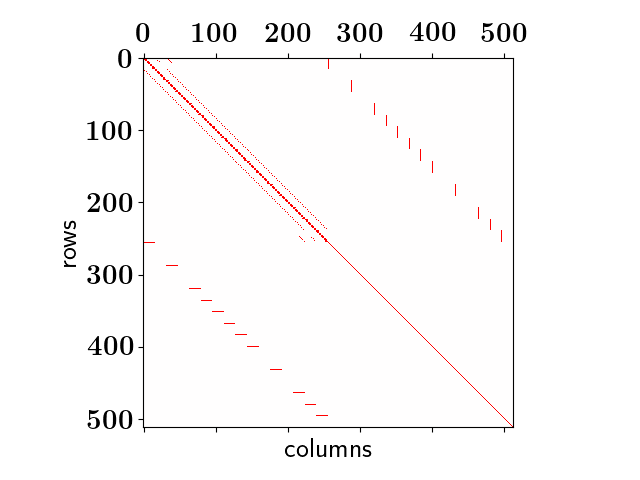

In [6]:
# ---------------------------------------------------------------
# --- Plot the mask ---
# ---------------------------------------------------------------
mix.reload_module(qucf_r)

# dd_work = dict(dd_NH_orig)
dd_work = dict(dd_44)

figA_mask = qucf_r.plot_matrix(dd_work["A-mask"], fontsize = 20, cmap = "bwr")
# figA_mask_cc = qucf_r.plot_matrix(dd_work["A-mask-cc"], fontsize = 20, cmap = "bwr")

del dd_work

In [7]:
# ---------------------------------------------------------------
# --- Print matrix subblocks ---
# ---------------------------------------------------------------
mix.reload_module(mix)
def print_submatrix(dd, coef = 1, i_shift = 0, flag_imag = False):
    d = 1./np.sqrt(2)
    nx, nv = dd["regs"]["rx"], dd["regs"]["rv"]
    Nx, Nv = 1<<dd["regs"]["rx"], 1<<dd["regs"]["rv"]
    
    print("\n")
    print("****** Nx, Nv: {:d}, {:d} *************************************".format(Nx, Nv))
    
    max_val = np.max(np.max(np.abs(dd["A"])))
    print("max|A|: {:0.3e}".format(max_val))
    
    min_val = np.min(np.min(np.abs(dd["A"][np.nonzero(dd["A"])])))
    print("min|A|: {:0.3e}".format(min_val))
    
    
    ir_x, ic_x = 0, 0 # x[0], diag
#     ir_x, ic_x = 0, 1 # V-f: x[0], diag+1
#     ir_x, ic_x = 0, 2 # V-f: x[0], diag+2
#     ir_x, ic_x = 0, 3 # V-f: x[0], diag+3

#     ir_x, ic_x = 1, 0 # V-f: x[1], diag-1
#     ir_x, ic_x = 1, 1 # V-f: x[1], diag
#     ir_x, ic_x = 1, 2 # V-f: x[1], diag+1
#     ir_x, ic_x = 1, 3 # V-f: x[1], diag+2

#     ir_x, ic_x = 2, 1 # V-f: x[1], diag-1
#     ir_x, ic_x = 2, 2 # V-f: x[1], diag
#     ir_x, ic_x = 2, 3 # V-f: x[1], diag+1

#     ir_x, ic_x = 3, 2 # V-f: x[1], diag-1
#     ir_x, ic_x = 3, 3 # V-f: x[1], diag
#     ir_x, ic_x = 3, 4 # V-f: x[1], diag+1

#     ir_x, ic_x = Nx-1, Nx-4 # V-f: x[1], diag-3
#     ir_x, ic_x = Nx-1, Nx-3 # V-f: x[1], diag-2
#     ir_x, ic_x = Nx-1, Nx-2 # V-f: x[1], diag-1
#     ir_x, ic_x = Nx-1, Nx-1 # V-f: x[1], diag


#    ir_x, ic_x = 0, Nx # V-E: x[0], diag
#     ir_x, ic_x = 1, Nx+1 # V-E: x[1], diag
    
#     ir_x, ic_x = Nx, 0 # A-f: x[0], diag
#     ir_x, ic_x = Nx+1, 1 # A-f: x[1], diag
    
#     ir_x, ic_x = Nx, Nx # A-E: x[0], diag
#     ir_x, ic_x = Nx+4, Nx+4 # A-E: x[4], diag
    
    # --------------------------------------------------
    Nr_print, Nc_print = Nv//coef, Nv//coef
    ir_start, ic_start = Nv * ir_x + i_shift*Nr_print, Nv * ic_x + i_shift*Nc_print
    
    print("ir-start, ir-end: {:d}, {:d}".format(ir_start, ir_start + Nr_print))
    print("ic-start, ic-end: {:d}, {:d}".format(ic_start, ic_start + Nc_print))
    
    print()
    print("d**(nv+2): {:0.3f}".format(d**(nv+2)) )
    
    print(d**7)
    print(d**8)
    print(d**9)
    print(d**10)

    print("-------------------------- Real part -----------------------------------------")
    mix.print_subblock_colored(
        dd["A-real"], 
        ir_start, ic_start,
        Nr_print, Nc_print,
        ff=[6, 3, "f"], 
        n_in_row = Nc_print, 
        gap_be = " ", 
        sep_r = Nv, 
        sep_c = Nv
    )

    if(flag_imag):
        print("\n\n-------------------------- Imag part -----------------------------------------")
        mix.print_subblock_colored(
            dd["A-imag"], 
            ir_start, ic_start,
            Nr_print, Nc_print,
            ff=[6, 3, "f"], 
            n_in_row = Nc_print, 
            gap_be = " ", 
            sep_r = Nv, 
            sep_c = Nv
        ) 

In [8]:
# ---------------------------------------------------------
# --- Print the matrix D ---
# ---------------------------------------------------------
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# print_submatrix(dd_33) 
# print()
# print_submatrix(dd_43) 
print()
print_submatrix(dd_44) 
# print()
# print_submatrix(dd_53) 
# print_submatrix(dd_53, 2, 0) 
# print_submatrix(dd_53, 2, 1) 


print()
print_submatrix(cl_44, flag_imag = True) 




****** Nx, Nv: 16, 16 *************************************
max|A|: 1.000e+00
min|A|: 8.798e-03
ir-start, ir-end: 0, 16
ic-start, ic-end: 0, 16

d**(nv+2): 0.125
0.08838834764831839
0.06249999999999996
0.04419417382415918
0.031249999999999972
-------------------------- Real part -----------------------------------------
--- 0:   0.062  0.044  0.044  0.031  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
--- 1:   0.044  0.088  0.031  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
--- 2:   0.000  0.044  0.062  0.031  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
--- 3:   0.000  0.000  0.031  0.062  0.044  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
--- 4:   0.000  0.000  0.000  0.031  0.088  0.044  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
--- 5:   0.000  0.000  0.000  0.000  0.044  0.088  0.044  0.000  0.000  0.0

In [22]:
# -----------------------------------------------
# --- Computation of oracle angles ---
# -----------------------------------------------
# 1. Normalize the original matrix and choose the submatrix F.

mix.reload_module(mix)
mix.reload_module(qucf_o)

# dd_q = dict(dd_55)
# dd_c = dict(cl_55)

dd_q = dict(dd_44)
dd_c = dict(cl_44)

# dd_q = dict(dd_33)
# dd_c = dict(cl_33)

# --- normalize the whole matrix A ---
Nx, Nv = 1<<dd_q["regs"]["rx"], 1<<dd_q["regs"]["rv"]
Nvar = Nx * Nv
del Nx, Nv

A = dd_c["A"]
D = dd_q["A-real"]
A_norm = qucf_o.normalize_matrix_A(A, D)
del A

# --- take only the submatrix F from the normalized matrix A ---
A_F_norm = A_norm[0:Nvar, 0:Nvar]
D_F      = D[0:Nvar, 0:Nvar]

del Nvar, A_norm, D

# 2. Define the circuit structure (problem-specific part):
mix.reload_module(kin)
oo_circ = kin.init_circuit_kin(dd_q)

# 3. Compute angles of rotations gates:
Tx, Ty, Tz = qucf_o.compute_angles(A_F_norm, D_F)

# 4. Rearrange angles:
mix.reload_module(qucf_o)
grid_Rx = qucf_o.create_grid_of_gates(oo_circ, Tx)
grid_Ry = qucf_o.create_grid_of_gates(oo_circ, Ty)
grid_Rz = qucf_o.create_grid_of_gates(oo_circ, Tz)

# 5. Create groups of angles:
mix.reload_module(qucf_o)
groups_Rx = qucf_o.create_groups(oo_circ, grid_Rx, "Rx")
groups_Ry = qucf_o.create_groups(oo_circ, grid_Ry, "Ry")
groups_Rz = qucf_o.create_groups(oo_circ, grid_Rz, "Rz")

# # 5.1 Count the number of groups:
# qucf_o.count_groups(oo_circ, groups_Rx, groups_Ry, groups_Rz)

# # 6. Sort the groups:
# mix.reload_module(qucf_o)
# sorted_groups_Rx = qucf_o.find_biggest_groups(oo_circ, groups_Rx)
# sorted_groups_Ry = qucf_o.find_biggest_groups(oo_circ, groups_Ry)
# sorted_groups_Rz = qucf_o.find_biggest_groups(oo_circ, groups_Rz)

# # 6.1 Count the number of groups:
# qucf_o.count_groups(oo_circ, sorted_groups_Rx, sorted_groups_Ry, sorted_groups_Rz)

# # 7. Extend the groups:
# ngrp_ext = 1
# ext_sorted_groups_Rx = qucf_o.extend_sorted_groups_NEW(oo_circ, sorted_groups_Rx, ngrp_ext = ngrp_ext)
# ext_sorted_groups_Ry = qucf_o.extend_sorted_groups_NEW(oo_circ, sorted_groups_Ry, ngrp_ext = ngrp_ext)
# ext_sorted_groups_Rz = qucf_o.extend_sorted_groups_NEW(oo_circ, sorted_groups_Rz, ngrp_ext = ngrp_ext)

# # 7.3 Construct the circuit:
# mix.reload_module(qucf_o)

# path_oracle = "/media/work/docs/codes/QuCF/simulations/KIN1D1D/"
# file_name_oracle = "circuit_OH"

# qucf_o.construct_circuit_OH(
#         path_oracle, file_name_oracle,
#         oo_circ, D_F, 
#         ext_sorted_groups_Rx, ext_sorted_groups_Ry, ext_sorted_groups_Rz
# )

amin.(excl. zero) value in D: 		8.798e-03
amax. value in A: 			4.000e+00
amin.(excl. zero) value in A: 		2.855e-04

amax. value in A-norm: 			8.798e-03
amin. (excl. zero)  value in A-norm: 	6.280e-07
Adding a register 'axr'...
Adding a register 'avr'...
Adding a register 'rx'...
Adding a register 'rv'...


In [21]:
# 5.2 Print angles:
mix.reload_module(qucf_o)
qucf_o.print_angles(oo_circ, groups_Rz, "Rz")


Group angles for the gate Rz
Section: 24
4.413510304922e+00 4.310731245092e+00 4.165184234363e+00 4.006705440437e+00 3.835745259031e+00 3.653547259616e+00 3.462253972927e+00 3.264873777957e+00 3.165029080795e+00 3.118156226385e+00 


In [19]:
# 5.2 Print angles:
mix.reload_module(qucf_o)
qucf_o.print_angles(oo_circ, groups_Rz, "Rz")


Group angles for the gate Rz
Section: 24
5.107148048032e+00 5.107212150596e+00 5.042721525788e+00 4.971832777390e+00 4.893751444950e+00 4.807602319955e+00 4.712441062362e+00 4.607280406317e+00 4.491138052683e+00 4.363114491172e+00 4.222508245508e+00 4.068971203189e+00 3.902695205052e+00 3.724601806925e+00 3.536483932543e+00 3.341033093354e+00 3.241613351663e+00 3.041571955516e+00 3.536483932543e+00 3.724601806925e+00 4.222508245508e+00 


In [ ]:
--- Groups for the gate Rz ---
Number of groups: 21
--- Groups for the gate Rx ---
Number of groups: 0
--- Groups for the gate Ry ---
Number of groups: 302

In [ ]:
--- Groups for the gate Rz ---
Number of groups: 10
--- Groups for the gate Rx ---
Number of groups: 0
--- Groups for the gate Ry ---
Number of groups: 182

In [9]:
--- Groups for the gate Rz ---
Number of groups: 7
--- Groups for the gate Rx ---
Number of groups: 0
--- Groups for the gate Ry ---
Number of groups: 121

SyntaxError: invalid syntax (3048003179.py, line 1)

In [ ]:
# 5.3 Reconstructed the matrix from the groups:
mix.reload_module(qucf_o)
A_rec = qucf_o.reconstruct_A_using_groups(oo_circ, D_F, groups_Rx, groups_Ry, groups_Rz)

# 5.4 Compare the reconstructed matrix with the original (normalized) matrix:
mix.reload_module(qucf_o)
qucf_o.compare_matrices(oo_circ, A_rec, A_F_norm)

In [97]:
# -------------------------------------------
# --- Print matrix ---
# -------------------------------------------
mix.reload_module(mix)
def print_submatrix_of_a_matrix(dd, A_matrix, coef = 1, i_shift = 0, flag_imag = False):
    d = 1./np.sqrt(2)
    nx, nv = dd["regs"]["rx"], dd["regs"]["rv"]
    Nx, Nv = 1<<dd["regs"]["rx"], 1<<dd["regs"]["rv"]
    
    print("\n")
    print("****** Nx, Nv: {:d}, {:d} *************************************".format(Nx, Nv))
    
    max_val = np.max(np.max(np.abs(A_matrix)))
    print("max|A|: {:0.3e}".format(max_val))
    
    min_val = np.min(np.min(np.abs(A_matrix[np.nonzero(A_matrix)])))
    print("min|A|: {:0.3e}".format(min_val))
    
    

    
#     ir_x, ic_x = 0, 0 # x[0], diag
#     ir_x, ic_x = 0, 1 # V-f: x[0], diag+1
#     ir_x, ic_x = 0, 2 # V-f: x[0], diag+2
#     ir_x, ic_x = 0, 3 # V-f: x[0], diag+3

    ir_x, ic_x = 1, 0 # V-f: x[1], diag-1
#     ir_x, ic_x = 1, 1 # V-f: x[1], diag
#     ir_x, ic_x = 1, 2 # V-f: x[1], diag+1
#     ir_x, ic_x = 1, 3 # V-f: x[1], diag+2

#     ir_x, ic_x = 2, 1 # V-f: x[1], diag-1
#     ir_x, ic_x = 2, 2 # V-f: x[1], diag
#     ir_x, ic_x = 2, 3 # V-f: x[1], diag+1

#     ir_x, ic_x = 3, 2 # V-f: x[1], diag-1
#     ir_x, ic_x = 3, 3 # V-f: x[1], diag
#     ir_x, ic_x = 3, 4 # V-f: x[1], diag+1

#     ir_x, ic_x = Nx-1, Nx-4 # V-f: x[1], diag-3
#     ir_x, ic_x = Nx-1, Nx-3 # V-f: x[1], diag-2
#     ir_x, ic_x = Nx-1, Nx-2 # V-f: x[1], diag-1
#     ir_x, ic_x = Nx-1, Nx-1 # V-f: x[1], diag
    
    # --------------------------------------------------
    Nr_print, Nc_print = Nv//coef, Nv//coef
    ir_start = Nv * ir_x + i_shift*Nr_print
    ic_start = Nv * ic_x + i_shift*Nc_print
    
    print("ir-start, ir-end: {:d}, {:d}".format(ir_start, ir_start + Nr_print))
    print("ic-start, ic-end: {:d}, {:d}".format(ic_start, ic_start + Nc_print))
    
    print()
    print("d**(nv+2): {:0.3f}".format(d**(nv+2)) )
    
    print(d**7)
    print(d**8)
    print(d**9)
    print(d**10)

    mix.print_subblock_colored(
        A_matrix, 
        ir_start, ic_start,
        Nr_print, Nc_print,
        ff=[10, 3, "e"], 
        n_in_row = Nc_print, 
        gap_be = " ", 
        sep_r = Nv, 
        sep_c = Nv
    )
    
# ----     
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

print()
print_submatrix_of_a_matrix(dd_q, Ty) 




****** Nx, Nv: 16, 16 *************************************
max|A|: nan
min|A|: nan
ir-start, ir-end: 16, 32
ic-start, ic-end: 0, 16

d**(nv+2): 0.125
0.08838834764831839
0.06249999999999996
0.04419417382415918
0.031249999999999972
--- 0:   1.056e-02        nan        nan        nan        nan        nan        nan        nan        nan        nan        nan        nan        nan        nan        nan        nan
--- 1:         nan  9.150e-03        nan        nan        nan        nan        nan        nan        nan        nan        nan        nan        nan        nan        nan        nan
--- 2:         nan        nan  7.742e-03        nan        nan        nan        nan        nan        nan        nan        nan        nan        nan        nan        nan        nan
--- 3:         nan        nan        nan  6.335e-03        nan        nan        nan        nan        nan        nan        nan        nan        nan        nan        nan        nan
--- 4:         nan        nan

Min. abs. nonzero in A-real: 1.547e-05
Min. abs. nonzero in A-imag: 2.639e-03

Max. abs. diff-real: 6.505e-19
Max. abs. diff-imag: 4.337e-19


In [13]:
# ----------------------------------------------------------------
# --- Read the matrix constructed by the complete oracle ---
# ----------------------------------------------------------------
mix.reload_module(qucf_r)
mix.reload_module(kin)
def get_submatrix_F(dd):
    
    nx, nv = dd["regs"]["rx"], dd["regs"]["rv"]
    Nx, Nv = 1<<dd["regs"]["rx"], 1<<dd["regs"]["rv"]
    N_var = Nx * Nv
    
    AF = dd["A"][:N_var, :N_var]
    return AF

dd_33_full = qucf_r.read_matrix(path_, "flat_full_33_OUTPUT.hdf5") # nv = 3, nx = 3
AF_oracle = get_submatrix_F(dd_33_full)

# Compare with the matrix computed classically
mix.reload_module(qucf_o)
qucf_o.compare_matrices(oo_circ, AF_oracle, A_F_norm)

Reading the matrix from: flat_full_33_OUTPUT.hdf5
from the path: ../simulations/KIN1D1D/
date of the simulation:  06-22-2023 16:31:27
matrix name:  U_BE
Min. abs. nonzero in A-real: 3.368e-06
Min. abs. nonzero in A-imag: 2.639e-03

Max. abs. diff-real: 1.771e-01
Max. abs. diff-imag: 1.794e-01


In [ ]:
# ---------------------------------------------------
# --- Test speedup due to the GPU parallelization ---
# --------------------------------------------------- 
mix.reload_module(qucf_o)

A, D = cl_44["A"], dd_44["A-real"]
A_norm = qucf_o.normalize_matrix_A(A, D)

print("Original python function:")
%timeit Tx, Ty, Tz = qucf_o.compute_angles.py_func(A_norm,D)
print("\nCUDA parallelized function:")
%timeit Tx, Ty, Tz = qucf_o.compute_angles(A_norm,D)

del A, D, A_norm